In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [9]:
def parse_baselines_results(filename):
    df = pd.read_csv(filename, sep='\t')
    result_df = df[['true_label', 'predicted_label']].copy()
    result_df['correct'] = result_df['true_label'] == result_df['predicted_label']
    return result_df

def parse_astir_results(filename):
    df = pd.read_csv(filename, sep='\t')
    result_df = df[['cell_labels', 'pred_labels']].copy()
    result_df.columns = ['true_label', 'predicted_label']
    result_df['correct'] = result_df['true_label'] == result_df['predicted_label']
    return result_df

def parse_celesta_results(filename):
    df = pd.read_csv(filename, sep=',')
    result_df = df[['cell_labels', 'Final cell type']].copy()
    result_df.columns = ['true_label', 'predicted_label']
    result_df['correct'] = result_df['true_label'] == result_df['predicted_label']
    return result_df

def parse_starling_results(filename):
    df = pd.read_csv(filename, sep='\t', index_col=0)
    result_df = df[['true_label', 'predicted_label']].copy()
    result_df['correct'] = result_df['true_label'] == result_df['predicted_label']
    return result_df

def parse_starlinglr_results(filename):
    return parse_baselines_results(filename)

def parse_stellar_results(filename):
    df = pd.read_csv(filename, sep='\t')
    result_df = df[['true_labels', 'predicted_labels']].copy()
    result_df.columns = ['true_label', 'predicted_label']
    result_df['correct'] = result_df['true_label'] == result_df['predicted_label']
    return result_df

In [10]:
xgb_results_path = 'Baselines/xgb_predictions.tsv'
rf_results_path = 'Baselines/rf_predictions.tsv'
logreg_results_path = 'Baselines/logreg_predictions.tsv'
mlp_results_path = 'Baselines/mlp_predictions.tsv'
astir_results_path = 'Astir/astir_predictions.tsv'
celesta_results_path = 'Celesta/celesta_predictions_bis.csv'
starling_results_path = 'Starling/starling_predictions.tsv'
starlinglr_results_path = 'Starling/starling-lr_predictions.tsv'
stellar_results_path = 'Stellar/stellar_predictions.tsv'

xgb_results = parse_baselines_results(xgb_results_path)
rf_results = parse_baselines_results(rf_results_path)
logreg_results = parse_baselines_results(logreg_results_path)
mlp_results = parse_baselines_results(mlp_results_path)
astir_results = parse_astir_results(astir_results_path)
celesta_results = parse_celesta_results(celesta_results_path)
starling_results = parse_starling_results(starling_results_path)
starlinglr_results = parse_starlinglr_results(starlinglr_results_path)
stellar_results = parse_stellar_results(stellar_results_path)

results = {
    'XGBoost': xgb_results,
    'Random Forest': rf_results,
    'Logistic Regression': logreg_results,
    'MLP': mlp_results,
    'Astir': astir_results,
    'Celesta': celesta_results,
    'Starling': starling_results,
    'Starling+LR': starlinglr_results,
    'Stellar': stellar_results
}

/var/folders/y9/qwfrm4ns0q1bz21mv0w3h7k00000gn/T/ipykernel_3136/164201678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Accuracy', data=accuracy_df, palette='CMRmap')


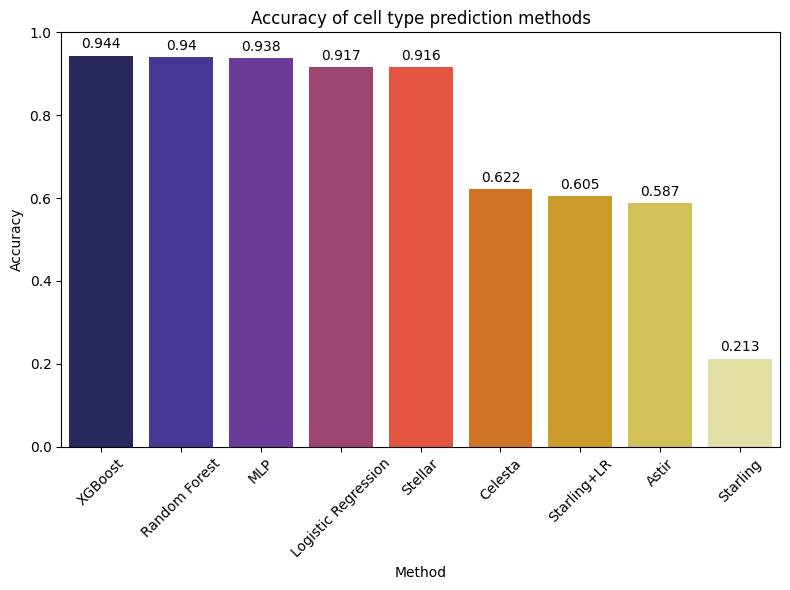

In [11]:
# Plot accuracy
accuracies = {k: v['correct'].mean() for k, v in results.items()}
accuracy_df = pd.DataFrame(accuracies.items(), columns=['Method', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)
plt.figure(figsize=(8, 6))

sns.barplot(x='Method', y='Accuracy', data=accuracy_df, palette='CMRmap')
# add data labels
for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy of cell type prediction methods')
plt.ylim(0, 1)
plt.tight_layout()
# plt.savefig('accuracy.png')
plt.show()

/var/folders/y9/qwfrm4ns0q1bz21mv0w3h7k00000gn/T/ipykernel_3136/29562758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Macro F1', data=f1_df, palette='gnuplot2')


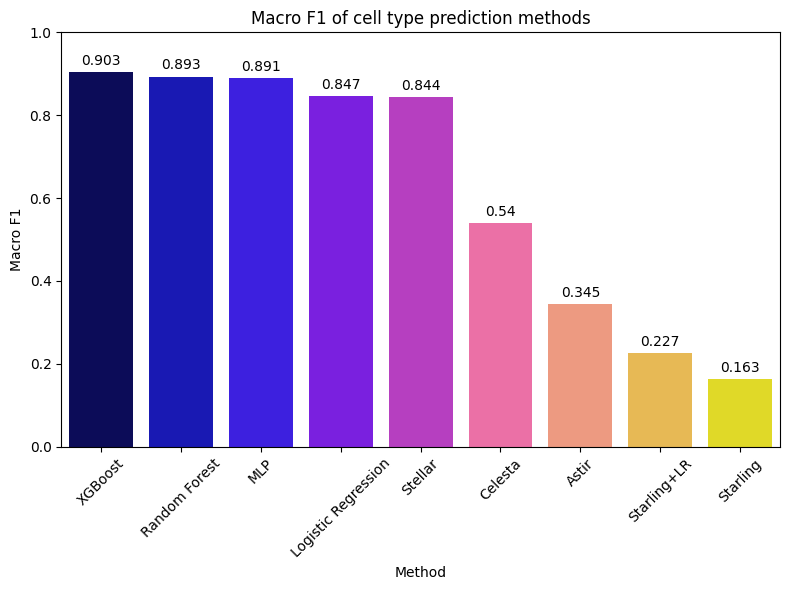

In [12]:
# Plot macro F1

def macro_f1(df):
    return f1_score(df['true_label'], df['predicted_label'], average='macro')

f1_scores = {k: macro_f1(v) for k, v in results.items()}
f1_df = pd.DataFrame(f1_scores.items(), columns=['Method', 'Macro F1'])
f1_df = f1_df.sort_values('Macro F1', ascending=False)
plt.figure(figsize=(8, 6))

sns.barplot(x='Method', y='Macro F1', data=f1_df, palette='gnuplot2')
# add data labels
for i, v in enumerate(f1_df['Macro F1']):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('Macro F1')
plt.title('Macro F1 of cell type prediction methods')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('macro_f1.png')
plt.show()


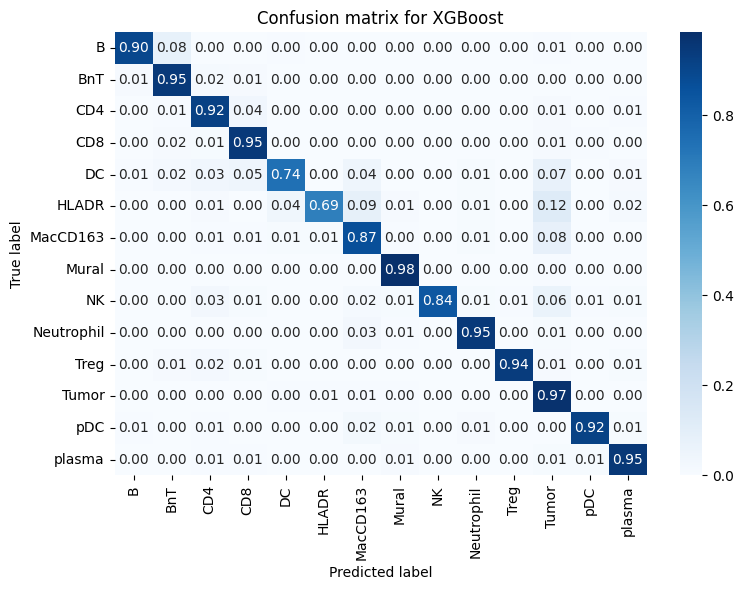

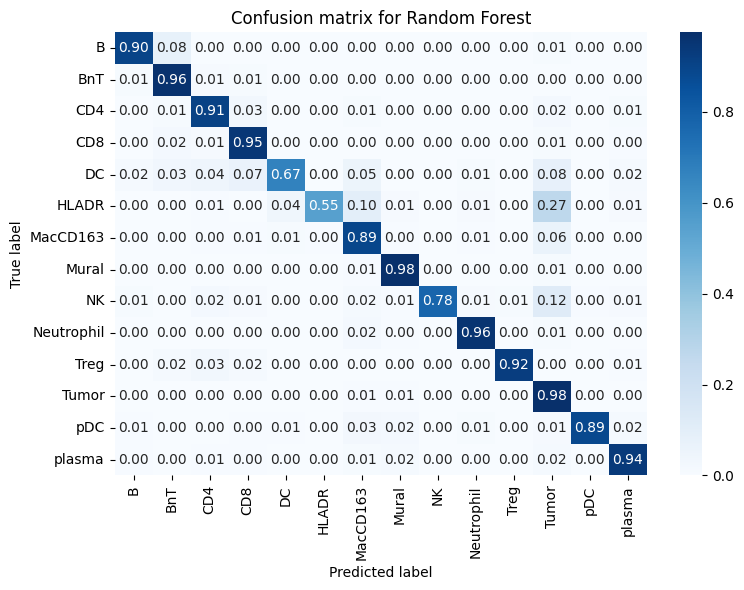

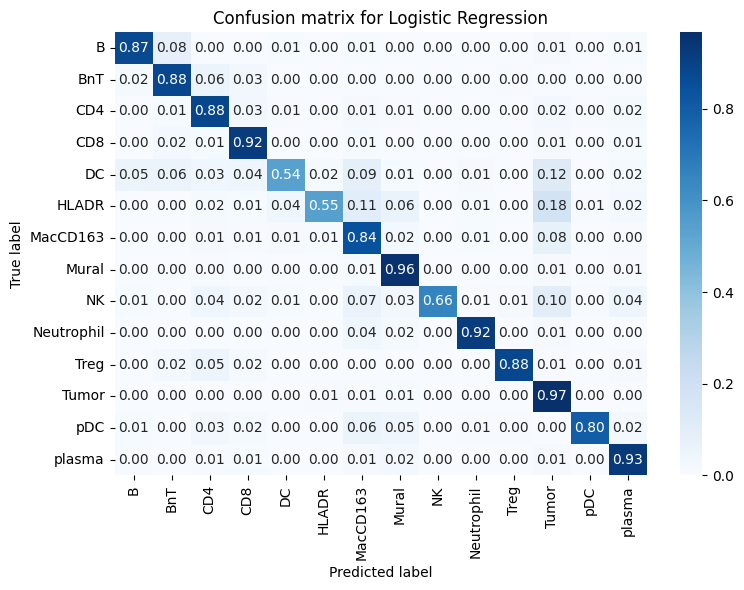

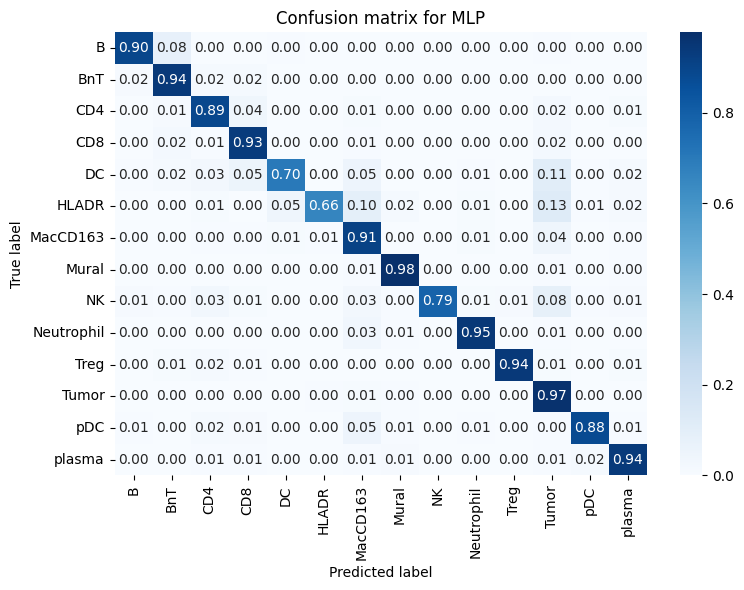

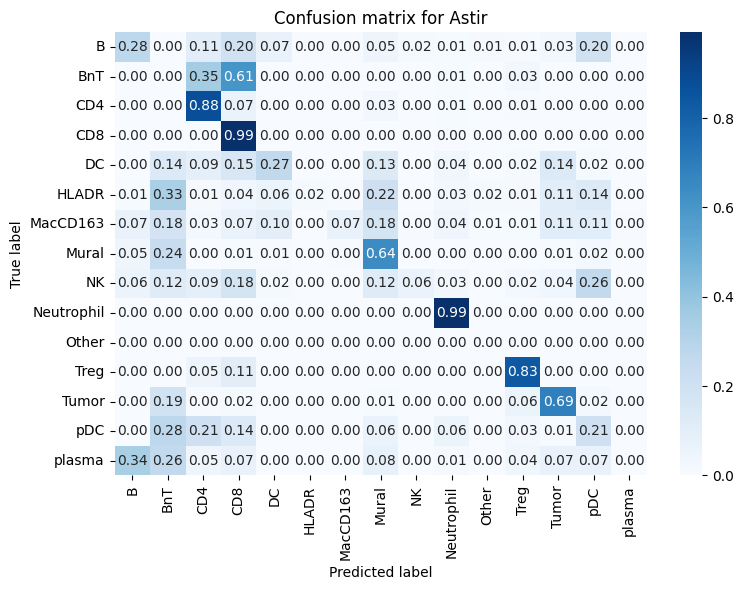

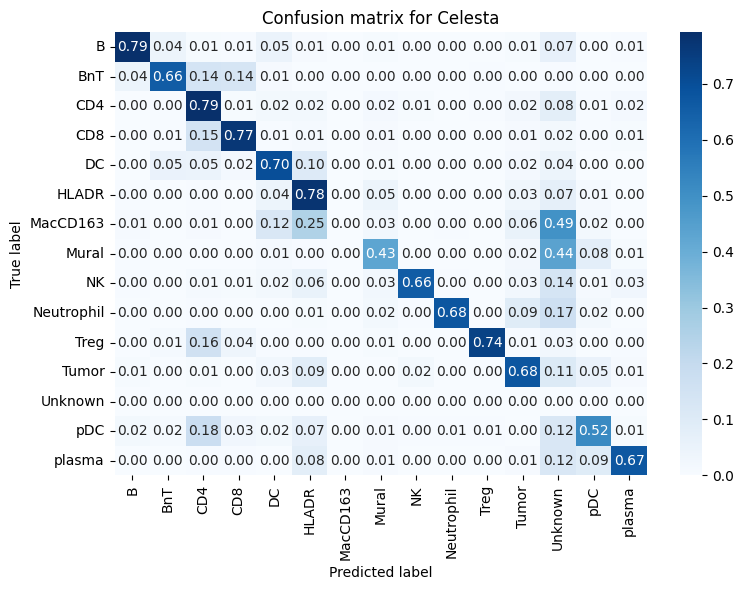

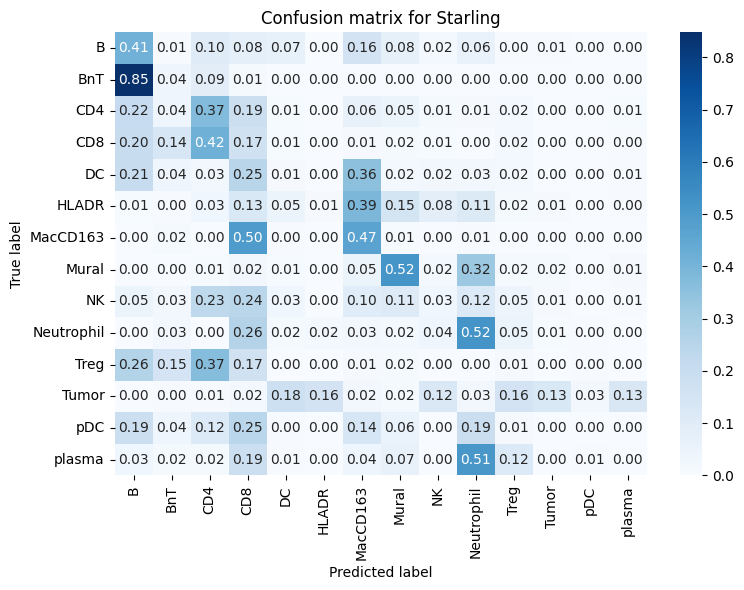

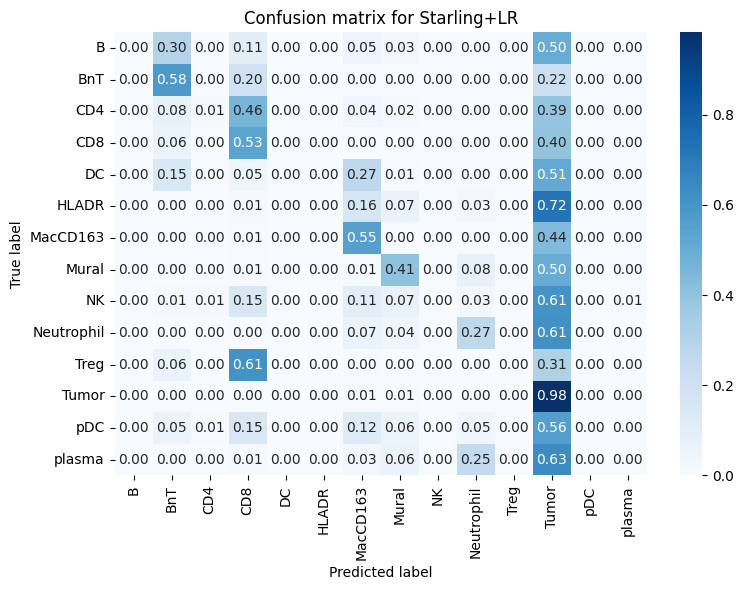

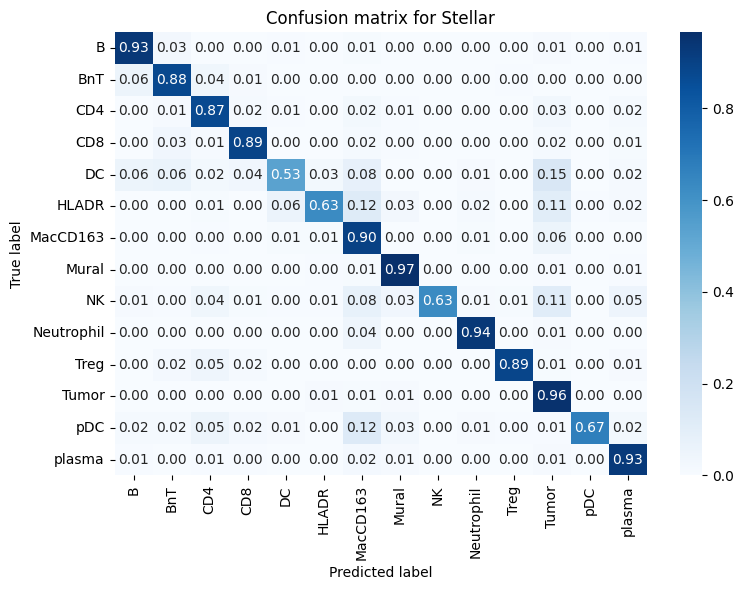

In [13]:
# Plot confusion matrix

def plot_confusion_matrix(df, method):
    cm = confusion_matrix(df['true_label'], df['predicted_label'], normalize='true')
    plt.figure(figsize=(8, 6))
    ticks = sorted(list(set(df['predicted_label'].unique()).union(set(df['true_label'].unique()))))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=ticks, yticklabels=ticks)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion matrix for {method}')
    plt.tight_layout()
    # plt.savefig(f'{method}_confusion_matrix.png')
    plt.show()

for method, df in results.items():
    plot_confusion_matrix(df, method)

In [14]:
# Print classification report
for method, df in results.items():
    print(f'Classification report for {method}')
    print(classification_report(df['true_label'], df['predicted_label']))
    print()

Classification report for XGBoost
              precision    recall  f1-score   support

           B       0.96      0.90      0.93      2767
         BnT       0.88      0.95      0.91      3341
         CD4       0.92      0.92      0.92      6139
         CD8       0.92      0.95      0.93      6890
          DC       0.82      0.74      0.78      2048
       HLADR       0.78      0.69      0.73      1627
    MacCD163       0.90      0.87      0.88      6482
       Mural       0.96      0.98      0.97      8977
          NK       0.93      0.84      0.88       498
  Neutrophil       0.95      0.95      0.95      2633
        Treg       0.97      0.94      0.95      1903
       Tumor       0.97      0.97      0.97     41456
         pDC       0.87      0.92      0.89       843
      plasma       0.94      0.95      0.95      4199

    accuracy                           0.94     89803
   macro avg       0.91      0.90      0.90     89803
weighted avg       0.94      0.94      0.94   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           B       0.24      0.28      0.26      2767
         BnT       0.00      0.00      0.00      3341
         CD4       0.67      0.88      0.76      6139
         CD8       0.56      0.99      0.72      6890
          DC       0.33      0.27      0.30      2048
       HLADR       0.55      0.02      0.04      1627
    MacCD163       0.86      0.07      0.13      6482
       Mural       0.66      0.64      0.65      8977
          NK       0.19      0.06      0.09       498
  Neutrophil       0.76      0.99      0.86      2633
       Other       0.00      0.00      0.00         0
        Treg       0.34      0.83      0.49      1903
       Tumor       0.94      0.69      0.80     41456
         pDC       0.05      0.21      0.09       843
      plasma       0.00      0.00      0.00      4199

    accuracy                           0.59     89803
   macro avg       0.41      0.40      0.34     89803
weighted avg       0.71   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

              precision    recall  f1-score   support

           B       0.76      0.79      0.78      2767
         BnT       0.86      0.66      0.74      3341
         CD4       0.66      0.79      0.72      6139
         CD8       0.87      0.77      0.82      6890
          DC       0.37      0.70      0.48      2048
       HLADR       0.17      0.78      0.28      1627
    MacCD163       0.00      0.00      0.00      6482
       Mural       0.86      0.43      0.57      8977
          NK       0.26      0.66      0.37       498
  Neutrophil       0.97      0.68      0.80      2633
        Treg       0.95      0.74      0.83      1903
       Tumor       0.96      0.68      0.79     41456
     Unknown       0.00      0.00      0.00         0
         pDC       0.11      0.52      0.18       843
      plasma       0.80      0.67      0.73      4199

    accuracy                           0.62     89803
   macro avg       0.57      0.59      0.54     89803
weighted avg       0.80   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           B       1.00      0.00      0.01      2767
         BnT       0.47      0.58      0.52      3341
         CD4       0.55      0.01      0.02      6139
         CD8       0.40      0.53      0.46      6890
          DC       0.00      0.00      0.00      2048
       HLADR       0.00      0.00      0.00      1627
    MacCD163       0.64      0.55      0.59      6482
       Mural       0.78      0.41      0.53      8977
          NK       0.00      0.00      0.00       498
  Neutrophil       0.26      0.27      0.27      2633
        Treg       0.00      0.00      0.00      1903
       Tumor       0.64      0.98      0.78     41456
         pDC       0.00      0.00      0.00       843
      plasma       0.40      0.00      0.00      4199

    accuracy                           0.61     89803
   macro avg       0.37      0.24      0.23     89803
weighted avg       0.56      0.61      0.52     89803


Classification report fo